# Simple Linear regression model on Salary data

To get started we will ensure that the required libraries are available:

In [2]:

%pip install pip --upgrade pip
%pip install numpy
%pip install pandas
%pip install scipy
%pip install scikit-learn --upgrade
%pip install --upgrade xgboost
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

Next we will import our various libraries. It may be necessary to add others as we run the notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

pd.options.mode.copy_on_write = True # This will stop a warning when cleaning our data later in the notebook

## Import our data

We will now import the data from the CSV file. The column headings are in row 0.

In [4]:
df = pd.read_csv('ai_job_dataset_cleaned.csv', header = 0)

Let us see what the data looks like in the data frame.
To get an overall view of the data frame we ill use the various tools pandas gives us: head(), info(), describe() and shape:

In [5]:
df.head()

,years_experience,benefits_score,skill_AWS,skill_Azure,skill_Computer Vision,skill_Data Visualization,skill_Deep Learning,skill_Docker,skill_GCP,skill_Git,...,job_Machine Learning Engineer,job_Machine Learning Researcher,job_NLP Engineer,job_Principal Data Scientist,job_Research Scientist,Hub_Australasia,Hub_Europe,Hub_India,Hub_North America,Hub_UK
0,-0.956516,-1.591763,1,0,0,0,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,-0.778488,1.310179,0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0.111651,0.757428,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
3,0.111651,-1.108106,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,-0.600460,-0.831731,0,0,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   years_experience                 15202 non-null  float64
 1   benefits_score                   15202 non-null  float64
 2   skill_AWS                        15202 non-null  int64  
 3   skill_Azure                      15202 non-null  int64  
 4   skill_Computer Vision            15202 non-null  int64  
 5   skill_Data Visualization         15202 non-null  int64  
 6   skill_Deep Learning              15202 non-null  int64  
 7   skill_Docker                     15202 non-null  int64  
 8   skill_GCP                        15202 non-null  int64  
 9   skill_Git                        15202 non-null  int64  
 10  skill_Hadoop                     15202 non-null  int64  
 11  skill_Java                       15202 non-null  int64  
 12  skill_Kubernetes  

## Building the models

We could now create our 'X' and 'y' datasets, with 'salary_usd' being our prediction target:

We will start with a 80/20 split between training and testing data, and a random_state of 42 (From the hitchhikers guide to the galaxy)

In [7]:
from sklearn.model_selection import train_test_split
y = df['log_salary_usd']
X = df.drop(columns=['log_salary_usd'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12161, 51)
y_train shape: (12161,)
X_test shape: (3041, 51)
y_test shape: (3041,)


## Random forest regressor

In [8]:
print("Training Random Forest Model...")
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

Training Random Forest Model...
Training completed in 0.66 seconds

Random Forest Results:
  MAE:  0.2129
  RMSE: 0.2678
  R²:   0.7279


Lets look at feature importance:


Top 15 Most Important Features:
              feature  importance
0    years_experience    0.785400
48          Hub_India    0.147359
1      benefits_score    0.014353
11         skill_Java    0.001779
25   skill_TensorFlow    0.001679
16          skill_NLP    0.001660
20          skill_SQL    0.001619
18       skill_Python    0.001563
21        skill_Scala    0.001555
12   skill_Kubernetes    0.001518
28         remote_100    0.001509
13        skill_Linux    0.001507
17      skill_PyTorch    0.001489
26           remote_0    0.001488
15  skill_Mathematics    0.001441


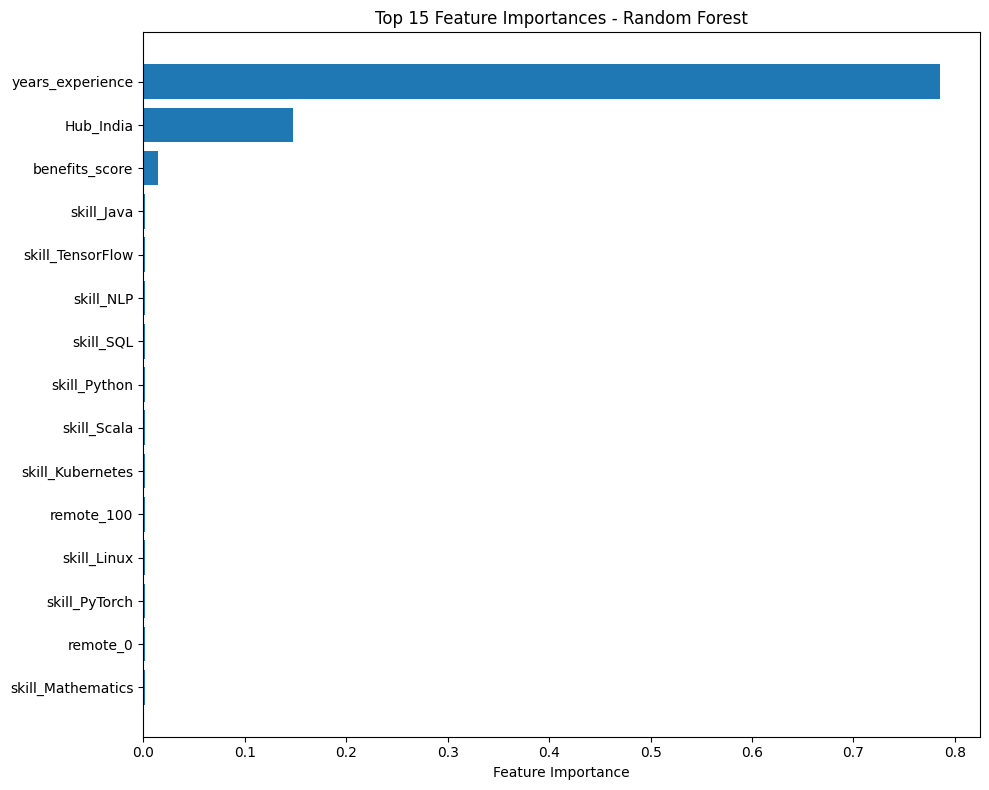

In [9]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This suggests that as India has the cheapest labour force, this location heavily influences the results. However contracts such as UK public sector often geofence their cloud requiring workers to work from inside the same country as their company networks.

Lets try some hyperparameter tuning:

In [10]:
print("Performing hyperparameter tuning...")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=50,                  # Number of parameter settings sampled
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)

print(f"Best parameters: {rf_random.best_params_}")
print(f"Best cross-validation score: {rf_random.best_score_:.4f}")

best_rf_model = rf_random.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

rf_tuned_results = evaluate_model(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")

Performing hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
Best cross-validation score: -0.0693

Random Forest (Tuned) Results:
  MAE:  0.2120
  RMSE: 0.2658
  R²:   0.7320


Trying XGBoost:

In [11]:
from xgboost import XGBRegressor

print("Training XGBoost Model...")
start_time = time.time()

# Basic XGBoost model first
xgb_model = XGBRegressor(
    n_estimators=100,  # changing n_estimators to 1000 produced a worse result
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

Training XGBoost Model...
Training completed in 0.20 seconds

XGBoost Results:
  MAE:  0.2161
  RMSE: 0.2737
  R²:   0.7159


Lets look at hyperparameter tuning


Top 15 Most Important Features (XGBoost):
                         feature  importance
0               years_experience    0.390807
48                     Hub_India    0.368281
40           job_ML Ops Engineer    0.006759
32      job_AI Software Engineer    0.006217
28                    remote_100    0.006030
16                     skill_NLP    0.005937
20                     skill_SQL    0.005651
33             job_AI Specialist    0.005594
24                 skill_Tableau    0.005447
25              skill_TensorFlow    0.005427
35              job_Data Analyst    0.005384
47                    Hub_Europe    0.005351
30        job_AI Product Manager    0.005334
15             skill_Mathematics    0.005254
44  job_Principal Data Scientist    0.005248


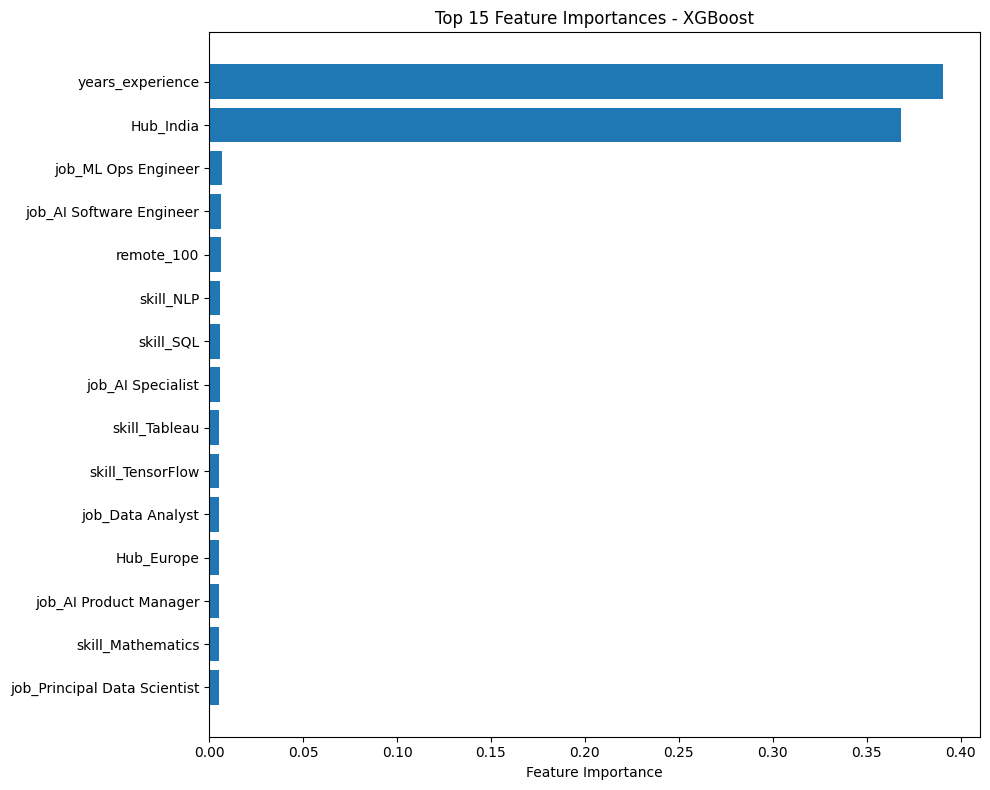

In [12]:
xgb_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (XGBoost):")
print(xgb_feature_importance.head(15))

# Plot XGBoost feature importance
plt.figure(figsize=(10, 8))
top_features_xgb = xgb_feature_importance.head(15)
plt.barh(top_features_xgb['feature'], top_features_xgb['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
print("Performing XGBoost hyperparameter tuning...")

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Use RandomizedSearchCV for faster tuning
xgb_random = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_param_grid,
    n_iter=100,                 # More iterations for better optimization
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)

print(f"Best XGBoost parameters: {xgb_random.best_params_}")
print(f"Best cross-validation score: {xgb_random.best_score_:.4f}")

# Use the best XGBoost model
best_xgb_model = xgb_random.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

xgb_tuned_results = evaluate_model(y_test, y_pred_xgb_tuned, "XGBoost (Tuned)")

Performing XGBoost hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best XGBoost parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 25, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best cross-validation score: -0.0691

XGBoost (Tuned) Results:
  MAE:  0.2121
  RMSE: 0.2658
  R²:   0.7321


This code also splits the existing X_train and y_train into a smaller training set and a validation set.
It's used here to create a validation set for early stopping in XGBoost.

In [14]:
# XGBoost 3.0+ with callbacks approach
print("Training XGBoost with Callbacks (XGBoost 3.0+ recommended)...")

from xgboost.callback import EarlyStopping

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Create early stopping callback
early_stop_callback = EarlyStopping(
    rounds=30,          # Number of rounds to wait
    metric_name='rmse',  # Metric to monitor
    data_name='validation_0',  # Name of validation set
    save_best=True      # Save the best model
)

xgb_early_stop = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    callbacks=[early_stop_callback]  # Add callback here
)

# Fit with validation set
xgb_early_stop.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=True
)

print(f"Training stopped at iteration: {xgb_early_stop.best_iteration}")
print(f"Best validation score: {xgb_early_stop.best_score:.4f}")

y_pred_xgb_early = xgb_early_stop.predict(X_test)
xgb_early_results = evaluate_model(y_test, y_pred_xgb_early, "XGBoost (Early Stopping)")

Training XGBoost with Callbacks (XGBoost 3.0+ recommended)...
[0]	validation_0-rmse:0.48059
[1]	validation_0-rmse:0.44797
[2]	validation_0-rmse:0.41986
[3]	validation_0-rmse:0.39550
[4]	validation_0-rmse:0.37475
[5]	validation_0-rmse:0.35726
[6]	validation_0-rmse:0.34231
[7]	validation_0-rmse:0.32959
[8]	validation_0-rmse:0.31915
[9]	validation_0-rmse:0.31043
[10]	validation_0-rmse:0.30322
[11]	validation_0-rmse:0.29728
[12]	validation_0-rmse:0.29242
[13]	validation_0-rmse:0.28852
[14]	validation_0-rmse:0.28528
[15]	validation_0-rmse:0.28265
[16]	validation_0-rmse:0.28053
[17]	validation_0-rmse:0.27884
[18]	validation_0-rmse:0.27740
[19]	validation_0-rmse:0.27634
[20]	validation_0-rmse:0.27551
[21]	validation_0-rmse:0.27477
[22]	validation_0-rmse:0.27416
[23]	validation_0-rmse:0.27371
[24]	validation_0-rmse:0.27337
[25]	validation_0-rmse:0.27311
[26]	validation_0-rmse:0.27295
[27]	validation_0-rmse:0.27292
[28]	validation_0-rmse:0.27285
[29]	validation_0-rmse:0.27282
[30]	validation_0-

Comparison:

In [15]:
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Create comparison DataFrame
comparison_data = {
    'Model': ['Random Forest (Tuned)', 'XGBoost (Default)', 'XGBoost (Tuned)', 'XGBoost (Early Stop)'],
    'MAE': [rf_tuned_results['MAE'], xgb_results['MAE'], xgb_tuned_results['MAE'], xgb_early_results['MAE']],
    'RMSE': [rf_tuned_results['RMSE'], xgb_results['RMSE'], xgb_tuned_results['RMSE'], xgb_early_results['RMSE']],
    'R²': [rf_tuned_results['R2'], xgb_results['R2'], xgb_tuned_results['R2'], xgb_early_results['R2']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model}")


MODEL COMPARISON SUMMARY
                Model      MAE     RMSE       R²
Random Forest (Tuned) 0.212038 0.265835 0.731962
    XGBoost (Default) 0.216086 0.273700 0.715866
      XGBoost (Tuned) 0.212097 0.265754 0.732126
 XGBoost (Early Stop) 0.213013 0.268205 0.727162

Best performing model: XGBoost (Tuned)


In [16]:
# Convert predictions to actual salary scale for better interpretation
print("\n" + "="*60)
print("ACTUAL SALARY SCALE COMPARISON")
print("="*60)

# Convert log predictions back to actual salaries
y_test_actual = np.expm1(y_test)
y_pred_rf_actual = np.expm1(y_pred_rf_tuned)
y_pred_xgb_actual = np.expm1(y_pred_xgb_tuned)

print(f"True salary range: ${y_test_actual.min():,.0f} - ${y_test_actual.max():,.0f}")
print(f"Mean actual salary: ${y_test_actual.mean():,.0f}")

print(f"\nRandom Forest MAE: ${mean_absolute_error(y_test_actual, y_pred_rf_actual):,.0f}")
print(f"XGBoost MAE: ${mean_absolute_error(y_test_actual, y_pred_xgb_actual):,.0f}")

# Relative error percentages
rf_relative_error = (mean_absolute_error(y_test_actual, y_pred_rf_actual) / y_test_actual.mean()) * 100
xgb_relative_error = (mean_absolute_error(y_test_actual, y_pred_xgb_actual) / y_test_actual.mean()) * 100

print(f"\nRandom Forest Relative MAE: {rf_relative_error:.2f}%")
print(f"XGBoost Relative MAE: {xgb_relative_error:.2f}%")


ACTUAL SALARY SCALE COMPARISON
True salary range: $16,795 - $394,917
Mean actual salary: $125,424

Random Forest MAE: $26,024
XGBoost MAE: $26,006

Random Forest Relative MAE: 20.75%
XGBoost Relative MAE: 20.73%


COMPREHENSIVE OVERFITTING ANALYSIS

1. TRAIN VS TEST PERFORMANCE COMPARISON
--------------------------------------------------

Random Forest (Basic):
  Train MAE: 0.1887 | Test MAE: 0.2129 | Gap: 0.0241 (12.8%)
  Train RMSE: 0.2333 | Test RMSE: 0.2678 | Gap: 0.0346 (14.8%)
  Train R²: 0.7957 | Test R²: 0.7279 | Gap: 0.0678 (8.5%)
  Status: 🟡 MODERATE OVERFITTING

Random Forest (Tuned):
  Train MAE: 0.2088 | Test MAE: 0.2120 | Gap: 0.0033 (1.6%)
  Train RMSE: 0.2586 | Test RMSE: 0.2658 | Gap: 0.0072 (2.8%)
  Train R²: 0.7490 | Test R²: 0.7320 | Gap: 0.0170 (2.3%)
  Status: 🟢 GOOD GENERALIZATION

XGBoost (Basic):
  Train MAE: 0.1829 | Test MAE: 0.2161 | Gap: 0.0332 (18.1%)
  Train RMSE: 0.2280 | Test RMSE: 0.2737 | Gap: 0.0457 (20.0%)
  Train R²: 0.8049 | Test R²: 0.7159 | Gap: 0.0890 (11.1%)
  Status: 🔴 HIGH OVERFITTING

XGBoost (Tuned):
  Train MAE: 0.2103 | Test MAE: 0.2121 | Gap: 0.0018 (0.8%)
  Train RMSE: 0.2610 | Test RMSE: 0.2658 | Gap: 0.0048 (1.8%)
  Train R²: 0.7443 | Test R²

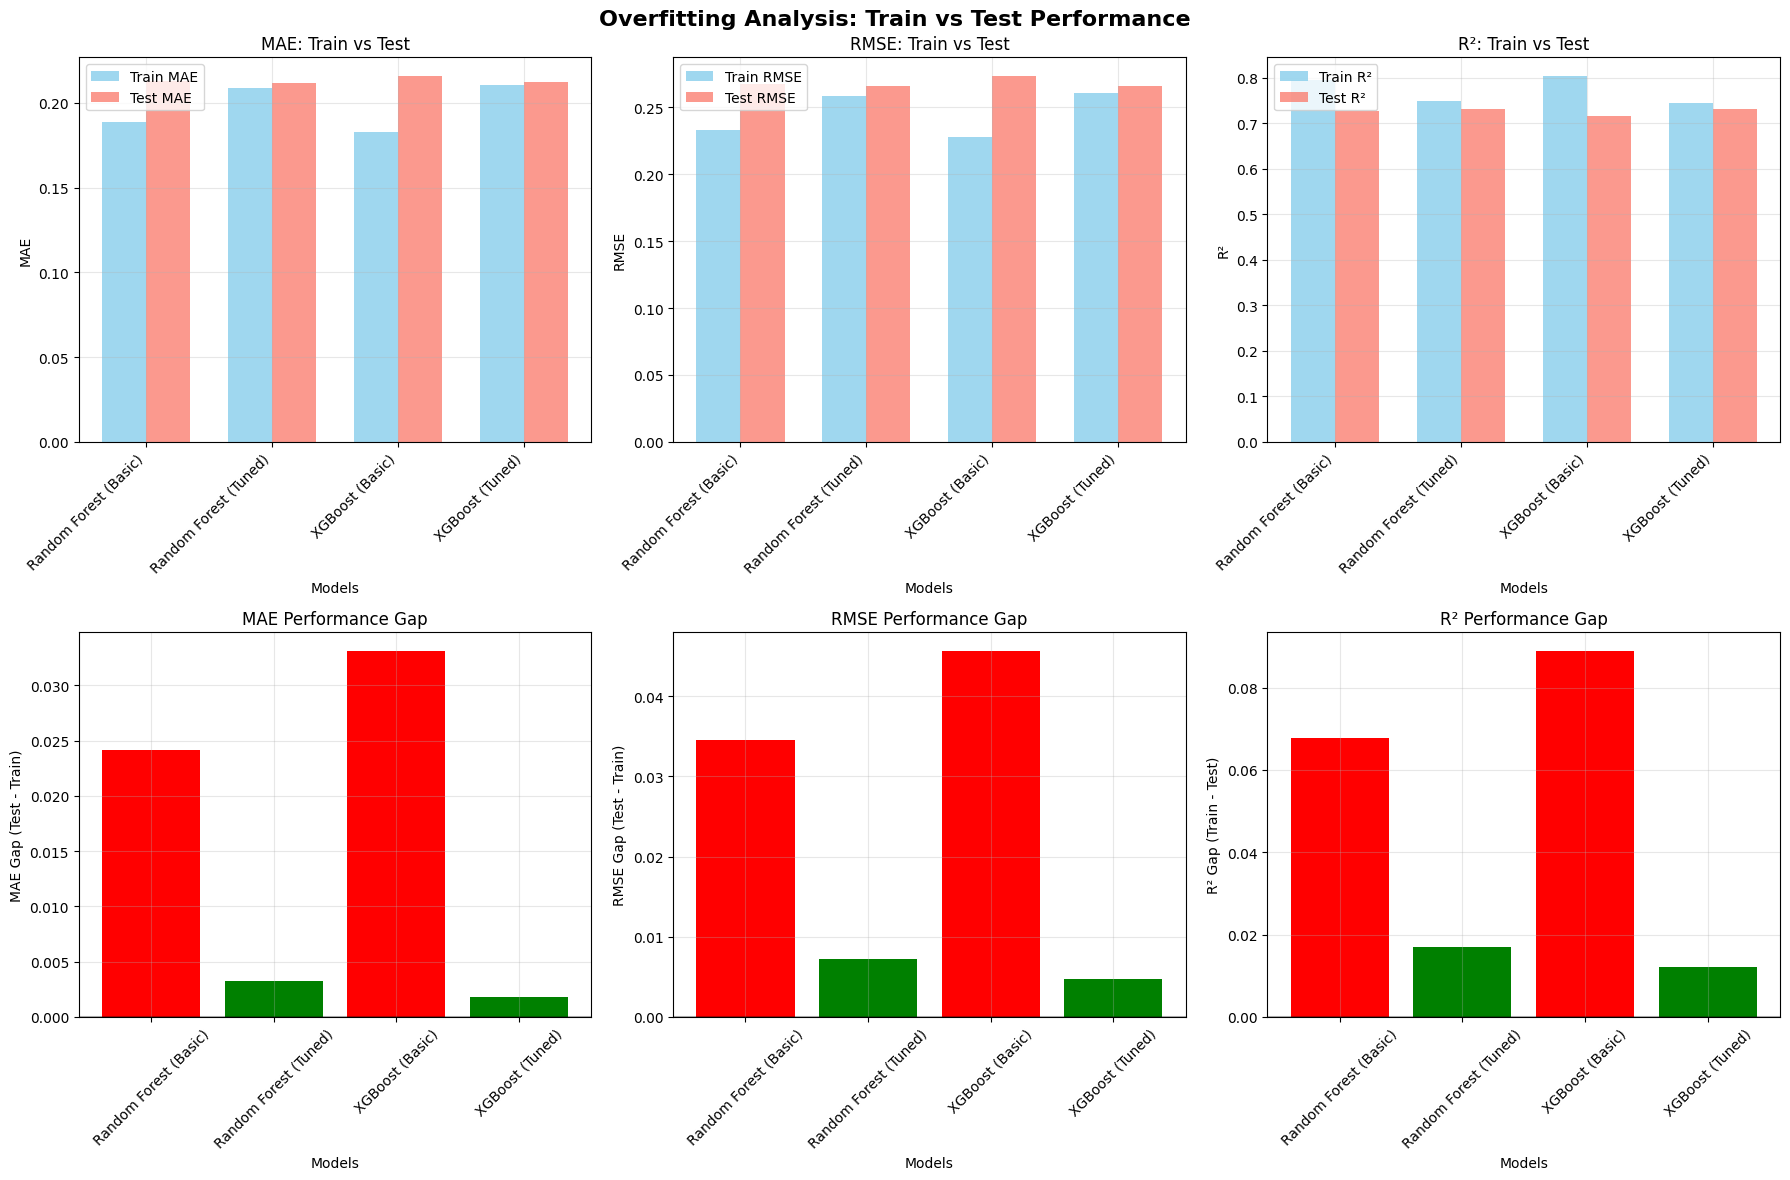


3. GENERATING LEARNING CURVES...


C:\Users\WatsonTh\AppData\Local\Temp\ipykernel_25012\2200907638.py:254: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\WatsonTh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


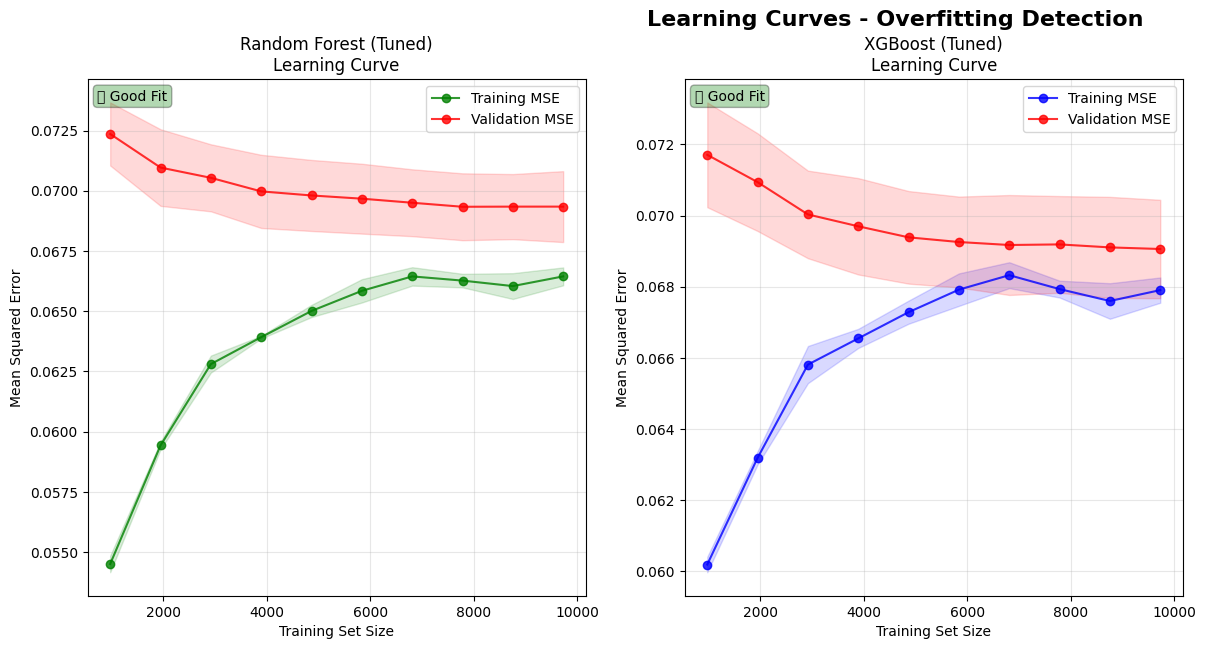


4. OVERFITTING SUMMARY REPORT
--------------------------------------------------

Model Rankings (Best to Worst):
4. XGBoost (Tuned)
   Test R²: 0.7321
   Overfitting Score: 1.43%
   Status: 🟢 GOOD GENERALIZATION
   Combined Score: 0.7178

2. Random Forest (Tuned)
   Test R²: 0.7320
   Overfitting Score: 2.21%
   Status: 🟢 GOOD GENERALIZATION
   Combined Score: 0.7098

1. Random Forest (Basic)
   Test R²: 0.7279
   Overfitting Score: 12.04%
   Status: 🟡 MODERATE OVERFITTING
   Combined Score: 0.6075

3. XGBoost (Basic)
   Test R²: 0.7159
   Overfitting Score: 16.41%
   Status: 🔴 HIGH OVERFITTING
   Combined Score: 0.5518


5. RECOMMENDATIONS TO REDUCE OVERFITTING
--------------------------------------------------
🔴 HIGH OVERFITTING DETECTED IN:
   • XGBoost (Basic)

🛠️ RECOMMENDED ACTIONS:
   1. Increase regularization parameters (reg_alpha, reg_lambda)
   2. Reduce model complexity (max_depth, n_estimators)
   3. Use early stopping with more patience
   4. Increase training data if p

In [24]:
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

def check_overfitting_comprehensive():
    """
    Comprehensive overfitting detection for all models in the notebook
    """
    
    print("="*80)
    print("COMPREHENSIVE OVERFITTING ANALYSIS")
    print("="*80)
    
    # Dictionary to store all model results
    models_data = {
        'Random Forest (Basic)': {
            'model': rf_model,
            'train_pred': rf_model.predict(X_train),
            'test_pred': y_pred_rf,
            'color': 'green'
        },
        'Random Forest (Tuned)': {
            'model': best_rf_model,
            'train_pred': best_rf_model.predict(X_train),
            'test_pred': y_pred_rf_tuned,
            'color': 'darkgreen'
        },
        'XGBoost (Basic)': {
            'model': xgb_model,
            'train_pred': xgb_model.predict(X_train),
            'test_pred': y_pred_xgb,
            'color': 'blue'
        },
        'XGBoost (Tuned)': {
            'model': best_xgb_model,
            'train_pred': best_xgb_model.predict(X_train),
            'test_pred': y_pred_xgb_tuned,
            'color': 'darkblue'
        }
    }
    
    # 1. TRAIN VS TEST PERFORMANCE COMPARISON
    print("\n1. TRAIN VS TEST PERFORMANCE COMPARISON")
    print("-" * 50)
    
    overfitting_results = []
    
    for model_name, data in models_data.items():
        # Calculate metrics for training data
        train_mae = mean_absolute_error(y_train, data['train_pred'])
        train_rmse = np.sqrt(mean_squared_error(y_train, data['train_pred']))
        train_r2 = r2_score(y_train, data['train_pred'])
        
        # Calculate metrics for test data
        test_mae = mean_absolute_error(y_test, data['test_pred'])
        test_rmse = np.sqrt(mean_squared_error(y_test, data['test_pred']))
        test_r2 = r2_score(y_test, data['test_pred'])
        
        # Calculate overfitting indicators
        mae_gap = test_mae - train_mae
        rmse_gap = test_rmse - train_rmse
        r2_gap = train_r2 - test_r2
        
        # Performance degradation percentages
        mae_degradation = (mae_gap / train_mae) * 100
        rmse_degradation = (rmse_gap / train_rmse) * 100
        r2_degradation = (r2_gap / train_r2) * 100 if train_r2 > 0 else 0
        
        # Overfitting severity assessment
        if mae_degradation > 20 or rmse_degradation > 20 or r2_degradation > 10:
            overfitting_level = "🔴 HIGH OVERFITTING"
        elif mae_degradation > 10 or rmse_degradation > 10 or r2_degradation > 5:
            overfitting_level = "🟡 MODERATE OVERFITTING"
        else:
            overfitting_level = "🟢 GOOD GENERALIZATION"
        
        overfitting_results.append({
            'Model': model_name,
            'Train_MAE': train_mae,
            'Test_MAE': test_mae,
            'MAE_Gap': mae_gap,
            'MAE_Degradation_%': mae_degradation,
            'Train_RMSE': train_rmse,
            'Test_RMSE': test_rmse,
            'RMSE_Gap': rmse_gap,
            'RMSE_Degradation_%': rmse_degradation,
            'Train_R2': train_r2,
            'Test_R2': test_r2,
            'R2_Gap': r2_gap,
            'R2_Degradation_%': r2_degradation,
            'Overfitting_Level': overfitting_level
        })
        
        print(f"\n{model_name}:")
        print(f"  Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f} | Gap: {mae_gap:.4f} ({mae_degradation:.1f}%)")
        print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f} | Gap: {rmse_gap:.4f} ({rmse_degradation:.1f}%)")
        print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f} | Gap: {r2_gap:.4f} ({r2_degradation:.1f}%)")
        print(f"  Status: {overfitting_level}")
    
    # Create overfitting summary DataFrame
    overfitting_df = pd.DataFrame(overfitting_results)
    
    # 2. VISUALIZATION: OVERFITTING COMPARISON
    print("\n2. GENERATING OVERFITTING VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Overfitting Analysis: Train vs Test Performance', fontsize=16, fontweight='bold')
    
    # MAE Comparison
    models = [result['Model'] for result in overfitting_results]
    train_maes = [result['Train_MAE'] for result in overfitting_results]
    test_maes = [result['Test_MAE'] for result in overfitting_results]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, train_maes, width, label='Train MAE', color='skyblue', alpha=0.8)
    axes[0, 0].bar(x + width/2, test_maes, width, label='Test MAE', color='salmon', alpha=0.8)
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('MAE')
    axes[0, 0].set_title('MAE: Train vs Test')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # RMSE Comparison
    train_rmses = [result['Train_RMSE'] for result in overfitting_results]
    test_rmses = [result['Test_RMSE'] for result in overfitting_results]
    
    axes[0, 1].bar(x - width/2, train_rmses, width, label='Train RMSE', color='skyblue', alpha=0.8)
    axes[0, 1].bar(x + width/2, test_rmses, width, label='Test RMSE', color='salmon', alpha=0.8)
    axes[0, 1].set_xlabel('Models')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].set_title('RMSE: Train vs Test')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # R² Comparison
    train_r2s = [result['Train_R2'] for result in overfitting_results]
    test_r2s = [result['Test_R2'] for result in overfitting_results]
    
    axes[0, 2].bar(x - width/2, train_r2s, width, label='Train R²', color='skyblue', alpha=0.8)
    axes[0, 2].bar(x + width/2, test_r2s, width, label='Test R²', color='salmon', alpha=0.8)
    axes[0, 2].set_xlabel('Models')
    axes[0, 2].set_ylabel('R²')
    axes[0, 2].set_title('R²: Train vs Test')
    axes[0, 2].set_xticks(x)
    axes[0, 2].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Performance Gap Analysis
    mae_gaps = [result['MAE_Gap'] for result in overfitting_results]
    rmse_gaps = [result['RMSE_Gap'] for result in overfitting_results]
    r2_gaps = [result['R2_Gap'] for result in overfitting_results]
    
    axes[1, 0].bar(models, mae_gaps, color=['red' if gap > 0.02 else 'orange' if gap > 0.01 else 'green' for gap in mae_gaps])
    axes[1, 0].set_xlabel('Models')
    axes[1, 0].set_ylabel('MAE Gap (Test - Train)')
    axes[1, 0].set_title('MAE Performance Gap')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].bar(models, rmse_gaps, color=['red' if gap > 0.02 else 'orange' if gap > 0.01 else 'green' for gap in rmse_gaps])
    axes[1, 1].set_xlabel('Models')
    axes[1, 1].set_ylabel('RMSE Gap (Test - Train)')
    axes[1, 1].set_title('RMSE Performance Gap')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].grid(True, alpha=0.3)
    
    axes[1, 2].bar(models, r2_gaps, color=['red' if gap > 0.05 else 'orange' if gap > 0.02 else 'green' for gap in r2_gaps])
    axes[1, 2].set_xlabel('Models')
    axes[1, 2].set_ylabel('R² Gap (Train - Test)')
    axes[1, 2].set_title('R² Performance Gap')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 3. LEARNING CURVES TO DETECT OVERFITTING
    print("\n3. GENERATING LEARNING CURVES...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Learning Curves - Overfitting Detection', fontsize=16, fontweight='bold')
    
    # Select key models for learning curves
    key_models = [
        ('Random Forest (Tuned)', best_rf_model, 'green'),
        ('XGBoost (Tuned)', best_xgb_model, 'blue')
    ]
    
    for idx, (name, model, color) in enumerate(key_models):
        if idx < 3:  # First row
            ax = axes[0, idx]
        else:  # Second row
            ax = axes[1, idx - 3]
        
        # Calculate learning curve
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train, y_train, cv=5, 
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            random_state=42
        )
        
        # Convert to positive MSE
        train_scores = -train_scores
        val_scores = -val_scores
        
        # Calculate mean and std
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        # Plot learning curves
        ax.plot(train_sizes, train_mean, 'o-', color=color, label='Training MSE', alpha=0.8)
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color=color)
        ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation MSE', alpha=0.8)
        ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')
        
        ax.set_xlabel('Training Set Size')
        ax.set_ylabel('Mean Squared Error')
        ax.set_title(f'{name}\nLearning Curve')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add overfitting assessment
        final_gap = val_mean[-1] - train_mean[-1]
        if final_gap > 0.02:
            ax.text(0.02, 0.98, '🔴 Overfitting Detected', transform=ax.transAxes, 
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
        elif final_gap > 0.01:
            ax.text(0.02, 0.98, '🟡 Slight Overfitting', transform=ax.transAxes, 
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))
        else:
            ax.text(0.02, 0.98, '🟢 Good Fit', transform=ax.transAxes, 
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
    
    # Hide unused subplots
    for idx in range(len(key_models), 6):
        if idx < 3:
            axes[0, idx].set_visible(False)
        else:
            axes[1, idx - 3].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 4. FINAL OVERFITTING SUMMARY
    print("\n4. OVERFITTING SUMMARY REPORT")
    print("-" * 50)
    
    # Find best performing model with least overfitting
    overfitting_df['Overfitting_Score'] = (
        overfitting_df['MAE_Degradation_%'] + 
        overfitting_df['RMSE_Degradation_%'] + 
        overfitting_df['R2_Degradation_%']
    ) / 3
    
    # Sort by test performance (R²) and overfitting score
    overfitting_df['Combined_Score'] = overfitting_df['Test_R2'] - (overfitting_df['Overfitting_Score'] / 100)
    overfitting_df_sorted = overfitting_df.sort_values('Combined_Score', ascending=False)
    
    print("\nModel Rankings (Best to Worst):")
    print("=" * 70)
    for idx, row in overfitting_df_sorted.iterrows():
        print(f"{idx+1}. {row['Model']}")
        print(f"   Test R²: {row['Test_R2']:.4f}")
        print(f"   Overfitting Score: {row['Overfitting_Score']:.2f}%")
        print(f"   Status: {row['Overfitting_Level']}")
        print(f"   Combined Score: {row['Combined_Score']:.4f}")
        print()
    
    # Recommendations
    print("\n5. RECOMMENDATIONS TO REDUCE OVERFITTING")
    print("-" * 50)
    
    high_overfitting_models = overfitting_df[overfitting_df['Overfitting_Level'].str.contains('HIGH')]
    
    if not high_overfitting_models.empty:
        print("🔴 HIGH OVERFITTING DETECTED IN:")
        for _, row in high_overfitting_models.iterrows():
            print(f"   • {row['Model']}")
        
        print("\n🛠️ RECOMMENDED ACTIONS:")
        print("   1. Increase regularization parameters (reg_alpha, reg_lambda)")
        print("   2. Reduce model complexity (max_depth, n_estimators)")
        print("   3. Use early stopping with more patience")
        print("   4. Increase training data if possible")
        print("   5. Apply feature selection to reduce noise")
        print("   6. Use cross-validation for hyperparameter tuning")
    
    print("\n✅ BEST BALANCED MODEL:")
    best_model = overfitting_df_sorted.iloc[0]
    print(f"   {best_model['Model']}")
    print(f"   • Test R²: {best_model['Test_R2']:.4f}")
    print(f"   • Overfitting Level: {best_model['Overfitting_Level']}")
    print(f"   • Performance Gap: {best_model['MAE_Degradation_%']:.1f}% MAE degradation")
    
    return overfitting_df_sorted

# Run the comprehensive overfitting analysis
overfitting_analysis = check_overfitting_comprehensive()

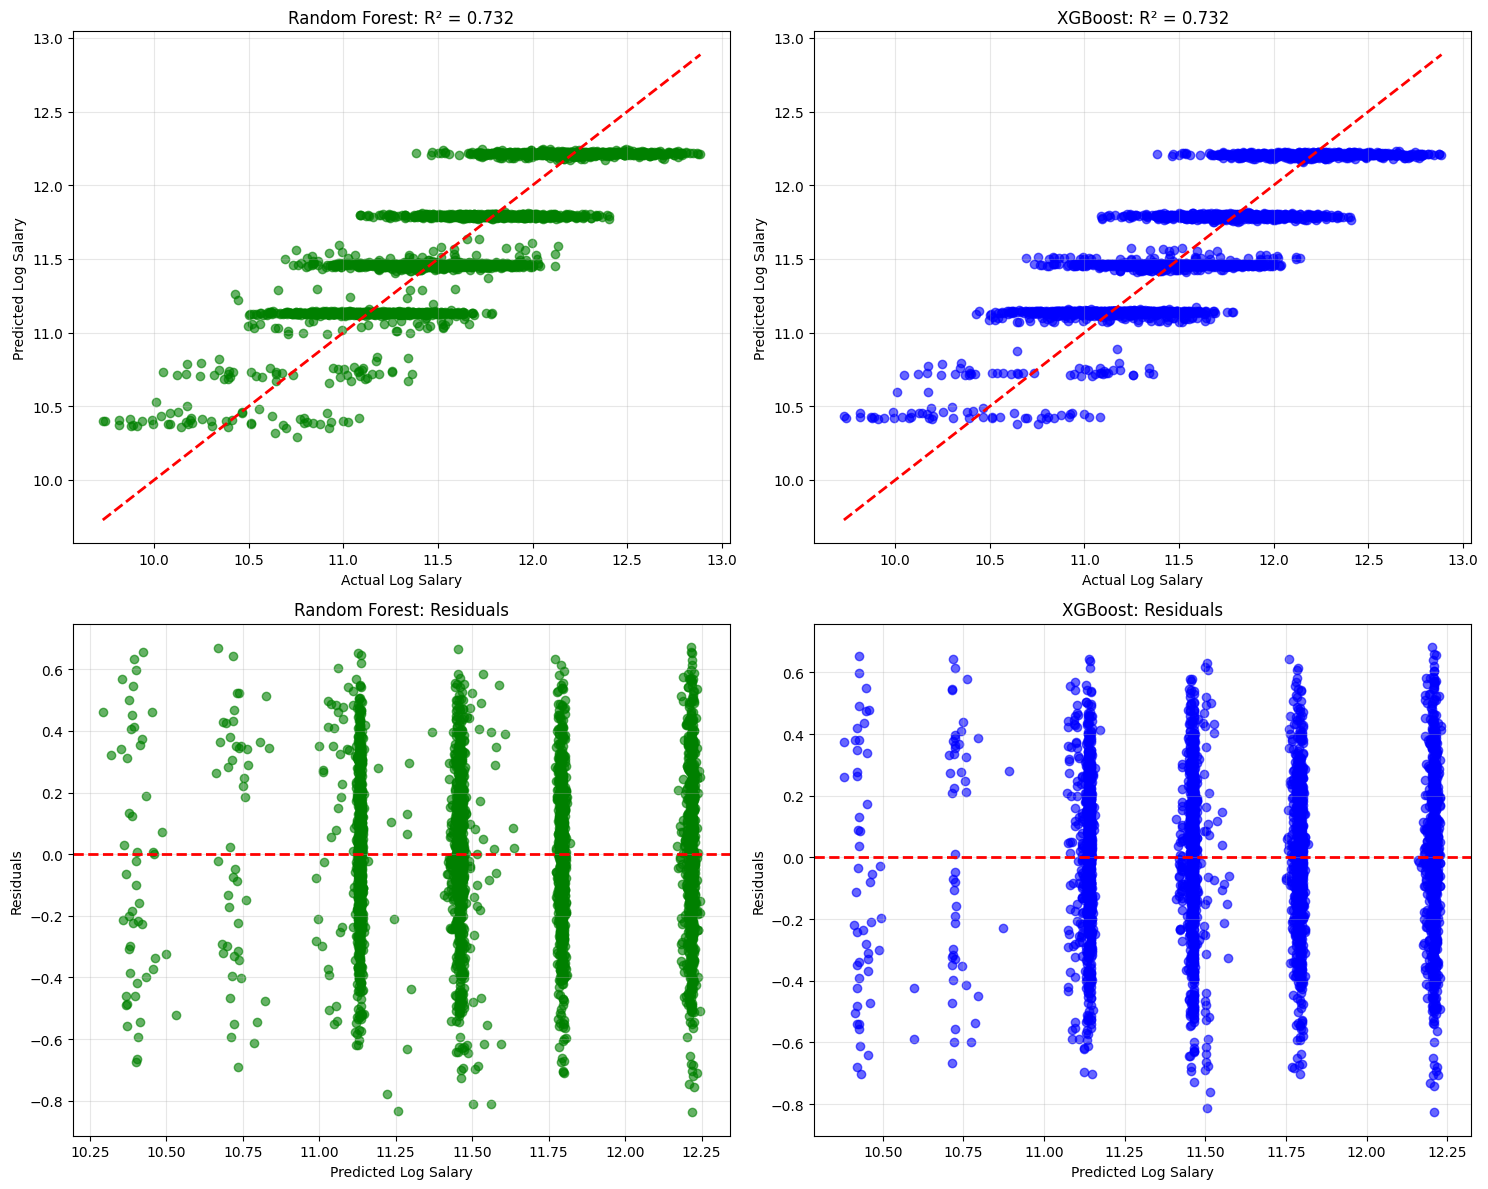

In [17]:
# Visualization: Model Performance Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest: Predicted vs Actual
axes[0, 0].scatter(y_test, y_pred_rf_tuned, alpha=0.6, color='green')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Log Salary')
axes[0, 0].set_ylabel('Predicted Log Salary')
axes[0, 0].set_title(f'Random Forest: R² = {rf_tuned_results["R2"]:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# XGBoost: Predicted vs Actual
axes[0, 1].scatter(y_test, y_pred_xgb_tuned, alpha=0.6, color='blue')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Log Salary')
axes[0, 1].set_ylabel('Predicted Log Salary')
axes[0, 1].set_title(f'XGBoost: R² = {xgb_tuned_results["R2"]:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Random Forest: Residuals
rf_residuals = y_test - y_pred_rf_tuned
axes[1, 0].scatter(y_pred_rf_tuned, rf_residuals, alpha=0.6, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Log Salary')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Random Forest: Residuals')
axes[1, 0].grid(True, alpha=0.3)

# XGBoost: Residuals
xgb_residuals = y_test - y_pred_xgb_tuned
axes[1, 1].scatter(y_pred_xgb_tuned, xgb_residuals, alpha=0.6, color='blue')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Log Salary')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('XGBoost: Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Lets create some business insights:

## Export best model for use in streamlit app:

In [45]:
import joblib
import pickle
from datetime import datetime

# Save the best performing model
print("Saving the best XGBoost model...")

# Create a timestamp for the model version
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save using joblib (recommended for scikit-learn compatible models)
model_filename = f'xgboost_salary_model_{timestamp}.joblib'
joblib.dump(best_xgb_model, model_filename)
print(f"Model saved as: {model_filename}")

# Also save using pickle as backup
pickle_filename = f'xgboost_salary_model_{timestamp}.pkl'
with open(pickle_filename, 'wb') as f:
    pickle.dump(best_xgb_model, f)
print(f"Model also saved as: {pickle_filename}")

# Save model metadata
model_metadata = {
    'model_type': 'XGBRegressor',
    'best_params': best_xgb_model.get_params(),
    'performance_metrics': xgb_tuned_results,
    'training_date': datetime.now().isoformat(),
    'feature_names': list(X_train.columns),
    'target_variable': 'log_salary_usd',
    'model_version': timestamp
}

metadata_filename = f'model_metadata_{timestamp}.json'
import json
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)
print(f"Model metadata saved as: {metadata_filename}")

Saving the best XGBoost model...
Model saved as: xgboost_salary_model_20250704_172503.joblib
Model also saved as: xgboost_salary_model_20250704_172503.pkl
Model metadata saved as: model_metadata_20250704_172503.json


Save the features for streamlit

In [46]:
# Save feature importance and column information
feature_info = {
    'feature_columns': list(X_train.columns),
    'feature_importance': dict(zip(X_train.columns, best_xgb_model.feature_importances_)),
    'expected_input_shape': X_train.shape[1],
    'categorical_columns': [col for col in X_train.columns if X_train[col].dtype == 'object'],
    'numerical_columns': [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
}

feature_info_filename = f'feature_info_{timestamp}.json'
with open(feature_info_filename, 'w') as f:
    json.dump(feature_info, f, indent=2, default=str)
print(f"Feature info saved as: {feature_info_filename}")

Feature info saved as: feature_info_20250704_172503.json


Some predictions:

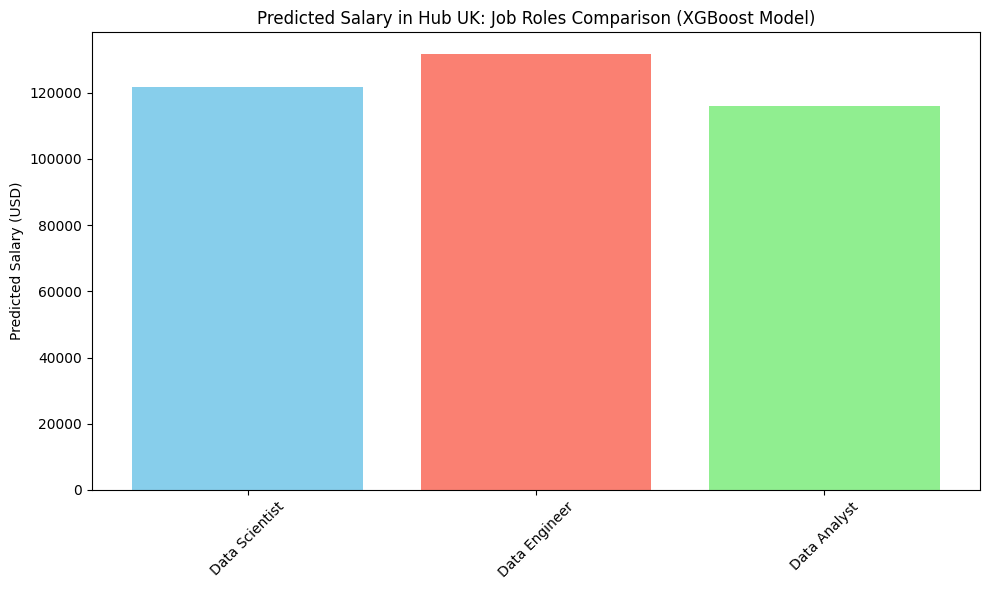

Predicted salaries in Hub UK:
Data Scientist: $121,833
Data Engineer: $131,633
Data Analyst: $115,982


In [19]:
# Use the trained XGBoost model instead of lasso_model
hub_uk_rows = df[df['Hub_UK'] == 1]

# 2. Select Data Scientist and Data Engineer rows
job_titles = ['job_Data Scientist', 'job_Data Engineer', 'job_Data Analyst']
title_labels = ['Data Scientist', 'Data Engineer', 'Data Analyst']
mean_salaries = []

for jt, label in zip(job_titles, title_labels):
    # Only rows where this job_title is ON (1)
    subset = hub_uk_rows[hub_uk_rows[jt] == 1]
    if subset.empty:
        mean_salaries.append(np.nan)
    else:
        # Prepare features: use the same columns as X_train
        X = subset[X_train.columns]
        log_preds = best_xgb_model.predict(X)  # Changed from lasso_model to best_xgb_model
        preds = np.expm1(log_preds)  # Changed from np.exp to np.expm1 for consistency
        mean_salaries.append(np.mean(preds))

# 3. Plot
plt.figure(figsize=(10, 6))
plt.bar(title_labels, mean_salaries, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Predicted Salary (USD)')
plt.title('Predicted Salary in Hub UK: Job Roles Comparison (XGBoost Model)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print("Predicted salaries in Hub UK:")
for label, salary in zip(title_labels, mean_salaries):
    if not np.isnan(salary):
        print(f"{label}: ${salary:,.0f}")
    else:
        print(f"{label}: No data available")

Analyzing Data Scientist salaries across different hubs...
Australasia: $130,194 (based on 44 Data Scientists)
Europe: $122,810 (based on 543 Data Scientists)
India: $64,674 (based on 53 Data Scientists)
North America: $121,328 (based on 121 Data Scientists)
UK: $121,833 (based on 56 Data Scientists)


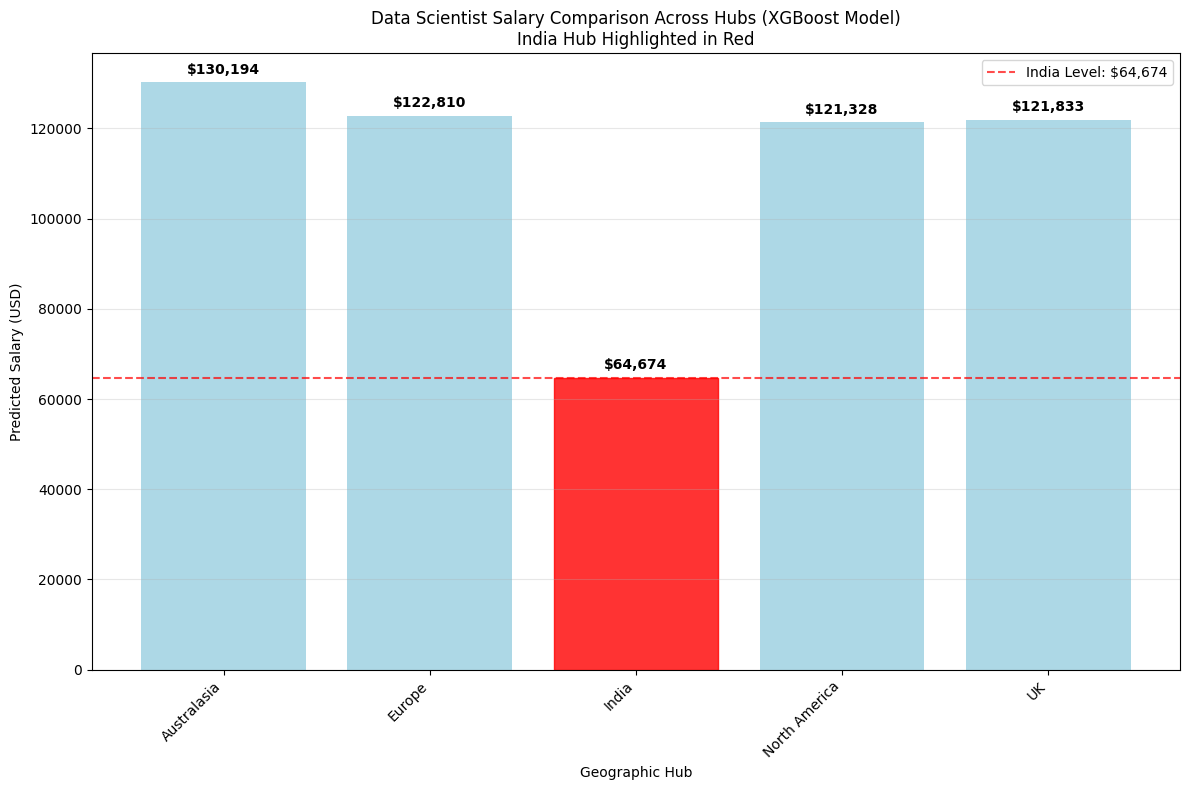


DATA SCIENTIST SALARY ANALYSIS SUMMARY
Highest paying hub: Australasia - $130,194
Lowest paying hub: India - $64,674
Salary range: $65,520

India hub ranking: #5 out of 5 hubs
India salary: $64,674
India is $65,520 below highest paying hub (Australasia)
India is $0 above lowest paying hub (India)
India pays 50.3% less than Australasia
India pays 0.0% more than India


In [20]:
# Compare Data Scientist salaries across all hubs using XGBoost model
print("Analyzing Data Scientist salaries across different hubs...")

# Get all hub columns
hub_columns = [col for col in df.columns if col.startswith('Hub_')]
hub_names = [col.replace('Hub_', '') for col in hub_columns]

# Initialize results
hub_salaries = []
hub_labels = []

# Filter for Data Scientists only
data_scientist_rows = df[df['job_Data Scientist'] == 1]

for hub_col, hub_name in zip(hub_columns, hub_names):
    # Get Data Scientists in this specific hub
    subset = data_scientist_rows[data_scientist_rows[hub_col] == 1]
    
    if subset.empty:
        print(f"No Data Scientists found in {hub_name}")
        continue
    else:
        # Prepare features: use the same columns as X_train
        X = subset[X_train.columns]
        log_preds = best_xgb_model.predict(X)
        preds = np.expm1(log_preds)  # Convert from log scale to actual salary
        mean_salary = np.mean(preds)
        
        hub_salaries.append(mean_salary)
        hub_labels.append(hub_name)
        
        print(f"{hub_name}: ${mean_salary:,.0f} (based on {len(subset)} Data Scientists)")

# Create the comparison bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(hub_labels, hub_salaries, color=['red' if hub == 'India' else 'lightblue' for hub in hub_labels])

# Highlight India in red for easy identification
for i, (bar, hub) in enumerate(zip(bars, hub_labels)):
    if hub == 'India':
        bar.set_color('red')
        bar.set_alpha(0.8)
    
# Add value labels on top of bars
for i, (bar, salary) in enumerate(zip(bars, hub_salaries)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hub_salaries)*0.01, 
             f'${salary:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.ylabel('Predicted Salary (USD)')
plt.xlabel('Geographic Hub')
plt.title('Data Scientist Salary Comparison Across Hubs (XGBoost Model)\nIndia Hub Highlighted in Red')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add a horizontal line for India's salary for easy comparison
if 'India' in hub_labels:
    india_salary = hub_salaries[hub_labels.index('India')]
    plt.axhline(y=india_salary, color='red', linestyle='--', alpha=0.7, 
                label=f'India Level: ${india_salary:,.0f}')
    plt.legend()

plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print("DATA SCIENTIST SALARY ANALYSIS SUMMARY")
print(f"{'='*60}")

if hub_salaries:
    max_salary = max(hub_salaries)
    min_salary = min(hub_salaries)
    max_hub = hub_labels[hub_salaries.index(max_salary)]
    min_hub = hub_labels[hub_salaries.index(min_salary)]
    
    print(f"Highest paying hub: {max_hub} - ${max_salary:,.0f}")
    print(f"Lowest paying hub: {min_hub} - ${min_salary:,.0f}")
    print(f"Salary range: ${max_salary - min_salary:,.0f}")
    
    if 'India' in hub_labels:
        india_salary = hub_salaries[hub_labels.index('India')]
        india_rank = sorted(hub_salaries, reverse=True).index(india_salary) + 1
        print(f"\nIndia hub ranking: #{india_rank} out of {len(hub_salaries)} hubs")
        print(f"India salary: ${india_salary:,.0f}")
        
        # Compare India to highest and lowest
        diff_from_highest = max_salary - india_salary
        diff_from_lowest = india_salary - min_salary
        print(f"India is ${diff_from_highest:,.0f} below highest paying hub ({max_hub})")
        print(f"India is ${diff_from_lowest:,.0f} above lowest paying hub ({min_hub})")
        
        # Percentage differences
        pct_below_highest = (diff_from_highest / max_salary) * 100
        pct_above_lowest = (diff_from_lowest / min_salary) * 100 if min_salary > 0 else 0
        print(f"India pays {pct_below_highest:.1f}% less than {max_hub}")
        print(f"India pays {pct_above_lowest:.1f}% more than {min_hub}")

Calculating Random Forest n_estimators validation curves...
Calculating Random Forest max_depth validation curves...
Calculating Random Forest min_samples_split validation curves...
Calculating XGBoost n_estimators validation curves...
Calculating XGBoost max_depth validation curves...
Calculating XGBoost learning_rate validation curves...
Calculating XGBoost reg_alpha validation curves...
Calculating XGBoost reg_lambda validation curves...
Calculating XGBoost subsample validation curves...


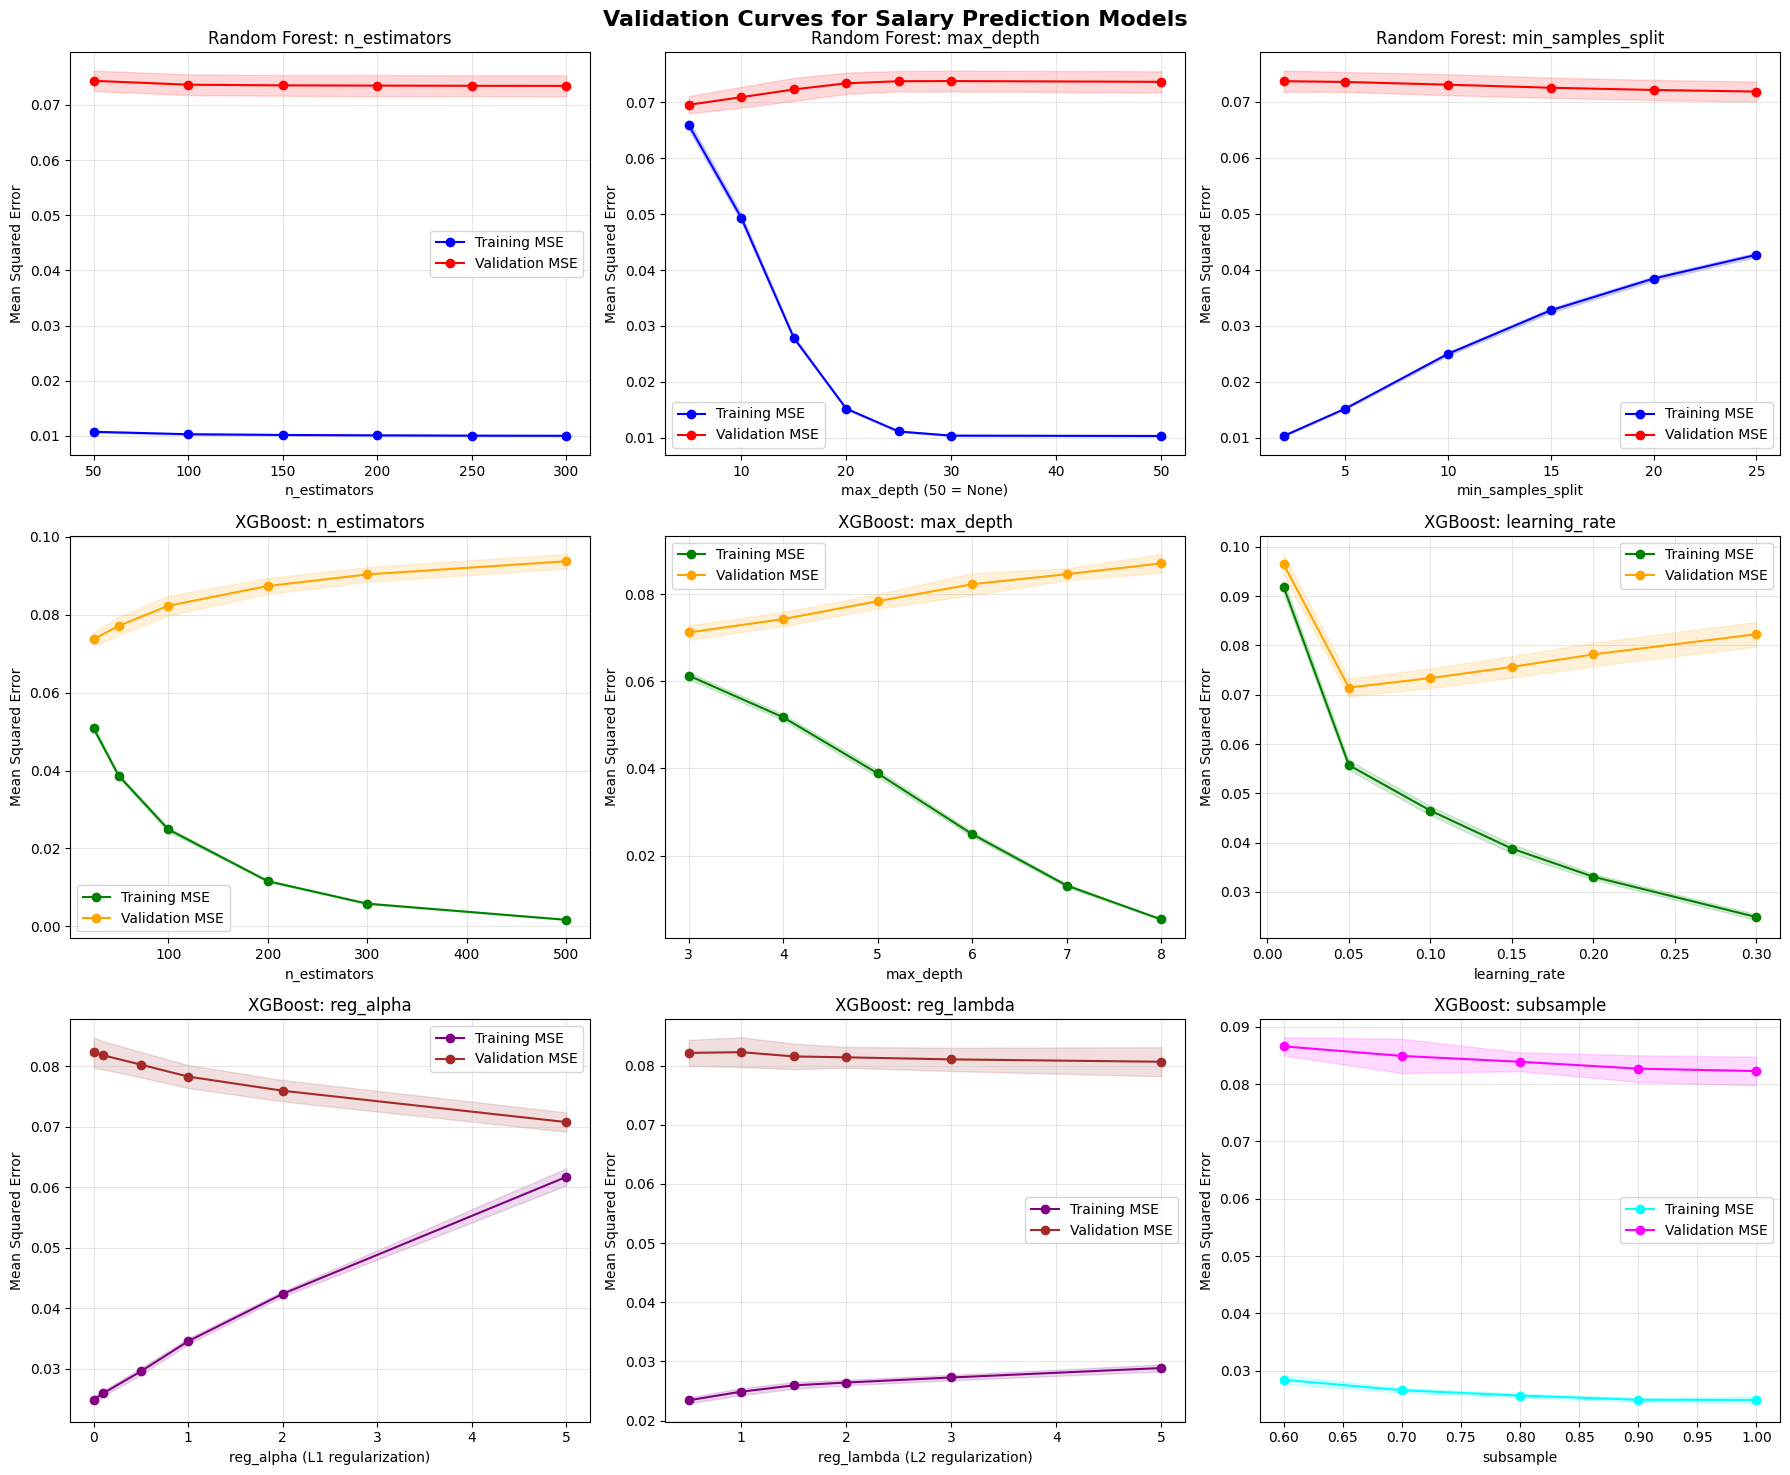


VALIDATION CURVES ANALYSIS COMPLETE
Key insights from validation curves:
• Look for the 'sweet spot' where validation error is minimized
• Watch for overfitting (large gap between training and validation)
• Identify optimal hyperparameter values for each model
• Use these insights to guide hyperparameter tuning


In [22]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

def plot_validation_curves_comprehensive():
    """
    Plot validation curves for Random Forest and XGBoost models with their key hyperparameters
    """
    
    # Create a figure with subplots for all validation curves
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Validation Curves for Salary Prediction Models', fontsize=16, fontweight='bold')
    
    # 1. Random Forest - n_estimators
    print("Calculating Random Forest n_estimators validation curves...")
    param_range_n_est = [50, 100, 150, 200, 250, 300]
    train_scores, test_scores = validation_curve(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="n_estimators",
        param_range=param_range_n_est, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)  # Convert to positive MSE
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[0, 0].plot(param_range_n_est, train_mean, 'o-', color='blue', label='Training MSE')
    axes[0, 0].fill_between(param_range_n_est, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    axes[0, 0].plot(param_range_n_est, test_mean, 'o-', color='red', label='Validation MSE')
    axes[0, 0].fill_between(param_range_n_est, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')
    axes[0, 0].set_xlabel('n_estimators')
    axes[0, 0].set_ylabel('Mean Squared Error')
    axes[0, 0].set_title('Random Forest: n_estimators')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Random Forest - max_depth
    print("Calculating Random Forest max_depth validation curves...")
    param_range_depth = [5, 10, 15, 20, 25, 30, None]
    # Handle None values for max_depth
    param_range_depth_numeric = [5, 10, 15, 20, 25, 30, 50]  # Use 50 as proxy for None
    train_scores, test_scores = validation_curve(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="max_depth",
        param_range=[5, 10, 15, 20, 25, 30, None], cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[0, 1].plot(param_range_depth_numeric, train_mean, 'o-', color='blue', label='Training MSE')
    axes[0, 1].fill_between(param_range_depth_numeric, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    axes[0, 1].plot(param_range_depth_numeric, test_mean, 'o-', color='red', label='Validation MSE')
    axes[0, 1].fill_between(param_range_depth_numeric, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')
    axes[0, 1].set_xlabel('max_depth (50 = None)')
    axes[0, 1].set_ylabel('Mean Squared Error')
    axes[0, 1].set_title('Random Forest: max_depth')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Random Forest - min_samples_split
    print("Calculating Random Forest min_samples_split validation curves...")
    param_range_split = [2, 5, 10, 15, 20, 25]
    train_scores, test_scores = validation_curve(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="min_samples_split",
        param_range=param_range_split, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[0, 2].plot(param_range_split, train_mean, 'o-', color='blue', label='Training MSE')
    axes[0, 2].fill_between(param_range_split, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    axes[0, 2].plot(param_range_split, test_mean, 'o-', color='red', label='Validation MSE')
    axes[0, 2].fill_between(param_range_split, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')
    axes[0, 2].set_xlabel('min_samples_split')
    axes[0, 2].set_ylabel('Mean Squared Error')
    axes[0, 2].set_title('Random Forest: min_samples_split')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. XGBoost - n_estimators
    print("Calculating XGBoost n_estimators validation curves...")
    param_range_xgb_n_est = [25, 50, 100, 200, 300, 500]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="n_estimators",
        param_range=param_range_xgb_n_est, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[1, 0].plot(param_range_xgb_n_est, train_mean, 'o-', color='green', label='Training MSE')
    axes[1, 0].fill_between(param_range_xgb_n_est, train_mean - train_std, train_mean + train_std, alpha=0.15, color='green')
    axes[1, 0].plot(param_range_xgb_n_est, test_mean, 'o-', color='orange', label='Validation MSE')
    axes[1, 0].fill_between(param_range_xgb_n_est, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
    axes[1, 0].set_xlabel('n_estimators')
    axes[1, 0].set_ylabel('Mean Squared Error')
    axes[1, 0].set_title('XGBoost: n_estimators')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. XGBoost - max_depth
    print("Calculating XGBoost max_depth validation curves...")
    param_range_xgb_depth = [3, 4, 5, 6, 7, 8]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="max_depth",
        param_range=param_range_xgb_depth, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[1, 1].plot(param_range_xgb_depth, train_mean, 'o-', color='green', label='Training MSE')
    axes[1, 1].fill_between(param_range_xgb_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='green')
    axes[1, 1].plot(param_range_xgb_depth, test_mean, 'o-', color='orange', label='Validation MSE')
    axes[1, 1].fill_between(param_range_xgb_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
    axes[1, 1].set_xlabel('max_depth')
    axes[1, 1].set_ylabel('Mean Squared Error')
    axes[1, 1].set_title('XGBoost: max_depth')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. XGBoost - learning_rate
    print("Calculating XGBoost learning_rate validation curves...")
    param_range_lr = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="learning_rate",
        param_range=param_range_lr, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[1, 2].plot(param_range_lr, train_mean, 'o-', color='green', label='Training MSE')
    axes[1, 2].fill_between(param_range_lr, train_mean - train_std, train_mean + train_std, alpha=0.15, color='green')
    axes[1, 2].plot(param_range_lr, test_mean, 'o-', color='orange', label='Validation MSE')
    axes[1, 2].fill_between(param_range_lr, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
    axes[1, 2].set_xlabel('learning_rate')
    axes[1, 2].set_ylabel('Mean Squared Error')
    axes[1, 2].set_title('XGBoost: learning_rate')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    # 7. XGBoost - reg_alpha (L1 regularization)
    print("Calculating XGBoost reg_alpha validation curves...")
    param_range_alpha = [0, 0.1, 0.5, 1, 2, 5]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="reg_alpha",
        param_range=param_range_alpha, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[2, 0].plot(param_range_alpha, train_mean, 'o-', color='purple', label='Training MSE')
    axes[2, 0].fill_between(param_range_alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='purple')
    axes[2, 0].plot(param_range_alpha, test_mean, 'o-', color='brown', label='Validation MSE')
    axes[2, 0].fill_between(param_range_alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='brown')
    axes[2, 0].set_xlabel('reg_alpha (L1 regularization)')
    axes[2, 0].set_ylabel('Mean Squared Error')
    axes[2, 0].set_title('XGBoost: reg_alpha')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)
    
    # 8. XGBoost - reg_lambda (L2 regularization)
    print("Calculating XGBoost reg_lambda validation curves...")
    param_range_lambda = [0.5, 1, 1.5, 2, 3, 5]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="reg_lambda",
        param_range=param_range_lambda, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[2, 1].plot(param_range_lambda, train_mean, 'o-', color='purple', label='Training MSE')
    axes[2, 1].fill_between(param_range_lambda, train_mean - train_std, train_mean + train_std, alpha=0.15, color='purple')
    axes[2, 1].plot(param_range_lambda, test_mean, 'o-', color='brown', label='Validation MSE')
    axes[2, 1].fill_between(param_range_lambda, test_mean - test_std, test_mean + test_std, alpha=0.15, color='brown')
    axes[2, 1].set_xlabel('reg_lambda (L2 regularization)')
    axes[2, 1].set_ylabel('Mean Squared Error')
    axes[2, 1].set_title('XGBoost: reg_lambda')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)
    
    # 9. XGBoost - subsample
    print("Calculating XGBoost subsample validation curves...")
    param_range_subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
    train_scores, test_scores = validation_curve(
        XGBRegressor(random_state=42, n_jobs=-1),
        X_train, y_train, param_name="subsample",
        param_range=param_range_subsample, cv=3, scoring="neg_mean_squared_error", n_jobs=-1
    )
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[2, 2].plot(param_range_subsample, train_mean, 'o-', color='cyan', label='Training MSE')
    axes[2, 2].fill_between(param_range_subsample, train_mean - train_std, train_mean + train_std, alpha=0.15, color='cyan')
    axes[2, 2].plot(param_range_subsample, test_mean, 'o-', color='magenta', label='Validation MSE')
    axes[2, 2].fill_between(param_range_subsample, test_mean - test_std, test_mean + test_std, alpha=0.15, color='magenta')
    axes[2, 2].set_xlabel('subsample')
    axes[2, 2].set_ylabel('Mean Squared Error')
    axes[2, 2].set_title('XGBoost: subsample')
    axes[2, 2].legend()
    axes[2, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("VALIDATION CURVES ANALYSIS COMPLETE")
    print("="*80)
    print("Key insights from validation curves:")
    print("• Look for the 'sweet spot' where validation error is minimized")
    print("• Watch for overfitting (large gap between training and validation)")
    print("• Identify optimal hyperparameter values for each model")
    print("• Use these insights to guide hyperparameter tuning")

# Call the function to generate all validation curves
plot_validation_curves_comprehensive()